# 0: Section Overview

In this section, we will impliment a baseline model. This will provide a basic model against which more complex models can be compared. This comparison will help us to gauge the effectiveness of enhancements or modifications made to the model. Additionally, It sets a standard for evaluating whether more sophisticated models actually provide improvements in predictive performance (in our case, this performance metric is measured as the MSE).

# 1: Necessary Imports

In [106]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

# 2: Data Access

We will access the data in the same way we accessed the date in section 03-EDA

In [11]:
test_filepath = r"C:\Users\markm\OneDrive\Documents\University\Year 4\dst\GitHub\Assessment_1\Train_and_Test_data\test.xlsx" # Enter your file path for the train data
train_filepath = r"C:\Users\markm\OneDrive\Documents\University\Year 4\dst\GitHub\Assessment_1\Train_and_Test_data\train.xlsx" # Enter your file path for the test data

test_data = pd.read_excel(test_filepath)
train_data = pd.read_excel(train_filepath)

            date iso_code continent      location  Stringency Index  CH Index  \
0     2020-01-05      AND    Europe       Andorra               0.0       0.0   
1     2020-01-06      AND    Europe       Andorra               0.0       0.0   
2     2020-01-07      AND    Europe       Andorra               0.0       0.0   
3     2020-01-08      AND    Europe       Andorra               0.0       0.0   
4     2020-01-09      AND    Europe       Andorra               0.0       0.0   
...          ...      ...       ...           ...               ...       ...   
52257 2024-07-31      ZAF    Africa  South Africa               NaN       NaN   
52258 2024-08-01      ZAF    Africa  South Africa               NaN       NaN   
52259 2024-08-02      ZAF    Africa  South Africa               NaN       NaN   
52260 2024-08-03      ZAF    Africa  South Africa               NaN       NaN   
52261 2024-08-04      ZAF    Africa  South Africa               NaN       NaN   

       Gov Resp Index  Econ

In [ ]:
print(test_data.head())

# 3: Implimenting the baseline model: Linear Regression

Initally, let us train the model on the entire training data. Note that we don't require the first 4 columns (date, iso_code, continent and location). Therefore, the first thing we will do is remove these columns.

In [16]:
train_data_string_cols_rem = train_data.iloc[:, 4:]
test_data_string_cols_rem = test_data.iloc[:, 4:]

print(train_data_string_cols_rem.columns)

Index(['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinatio

### Training Data

We will select the relevant columns for our particular model, these being the dependent variable, 'reproduction_rate', and all the covariates, these being 'Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index' and 'days_since'. We also choose to remove any rows with missing values. Later on in the project we will evaluate how we can go about using those rows with missing information.

In [97]:
train_data_filtered = train_data_string_cols_rem[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']].dropna()

X_train = train_data_filtered[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
y_train = train_data_filtered['reproduction_rate']

print()
print(X_train.shape)
print(len(y_train))


(139717, 5)
139717


### Testing Data

We impliment the same filtering as we did with the training data.

In [98]:
test_data_filtered = test_data_string_cols_rem[['reproduction_rate','Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since']].dropna()

X_test = test_data_filtered[['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
y_test = test_data_filtered[['reproduction_rate']]

print()
print(X_test.shape)
print(len(y_test))


(29044, 5)
29044


In [99]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

print(X_test)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)
print("y_pred shape:", y_pred.shape)
print(y_pred)
# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)

# Print the MSE result
print(f'Mean Squared Error on the test data: {mse:.4f}')



       Stringency Index  CH Index  Gov Resp Index  Econ Sup Index  days_since
78                31.48     33.33           35.42            50.0          78
79                31.48     33.33           35.42            50.0          79
80                48.15     44.05           44.79            50.0          80
81                48.15     44.05           44.79            50.0          81
82                53.70     51.19           51.04            50.0          82
...                 ...       ...             ...             ...         ...
51675             11.11     21.43           21.88            25.0        1087
51676             11.11     21.43           21.88            25.0        1088
51677             11.11     21.43           21.88            25.0        1089
51678             11.11     21.43           21.88            25.0        1090
51679             11.11     21.43           21.88            25.0        1091

[29044 rows x 5 columns]
y_pred shape: (29044,)
[1.06203563 1.0

#### Addressing a TypeError

In [100]:
print(type(y_test))  # Should be pandas.Series or numpy.ndarray
print(type(y_pred))  # Should be pandas.Series or numpy.ndarray

y_test = y_test.squeeze()  # Convert DataFrame to Series
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


# 4: Cross-validation

# 5: Visualising our performance metric for the baseline model

## 5.1: Scatter Plot

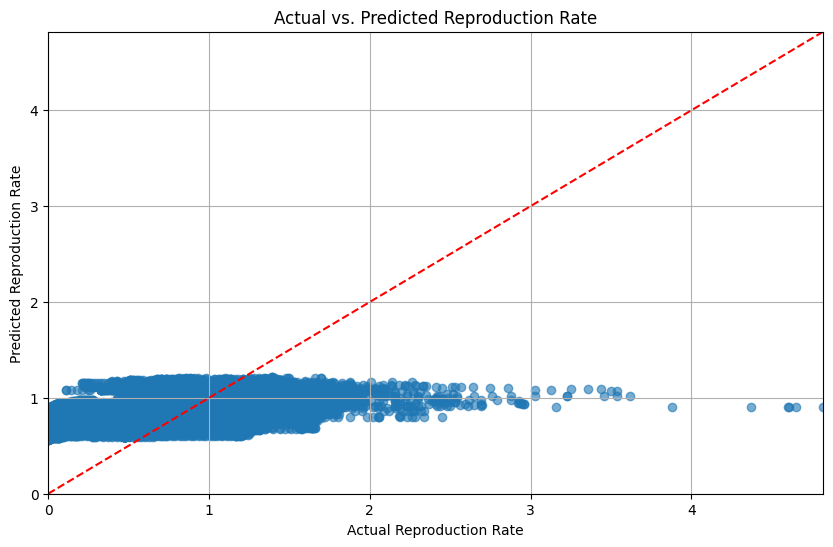

In [101]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Reproduction Rate')
plt.xlabel('Actual Reproduction Rate')
plt.ylabel('Predicted Reproduction Rate')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()

## 5.2: Residuals Plot

A residuals plot shows the residuals (the difference between actual and predicted values) on the y-axis against the predicted values on the x-axis. This can help identify any patterns in the errors.

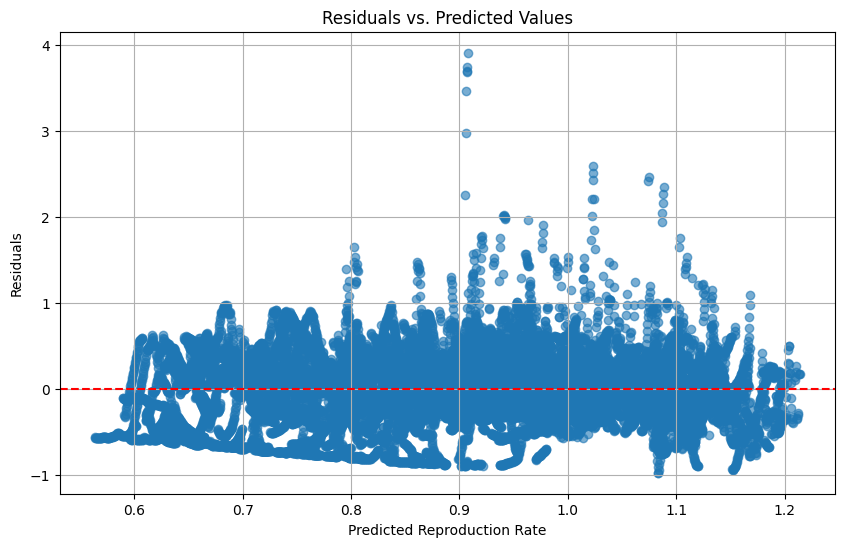

In [102]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Line at 0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Reproduction Rate')
plt.ylabel('Residuals')
plt.grid()
plt.show()


In [103]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (29044,)
y_pred shape: (29044,)


## 5.3: Histogram of Residuals

A histogram of the residuals can show the distribution of errors, which should ideally be normally distributed around zero if the model is well-fitted.

When we say that the residuals should be normally distributed around zero, we mean that:
Most of the errors (residuals) should be small and close to zero.
Errors should have a symmetrical distribution, with equal occurrences of positive and negative errors.
What This Implies:

If the residuals are normally distributed around zero, it suggests that:
The model is well-fitted to the data.
There is no systematic bias in the predictions. For instance, if the model consistently overestimates or underestimates the true values, this would show up as a skewed distribution of residuals, rather than a symmetric one around zero.

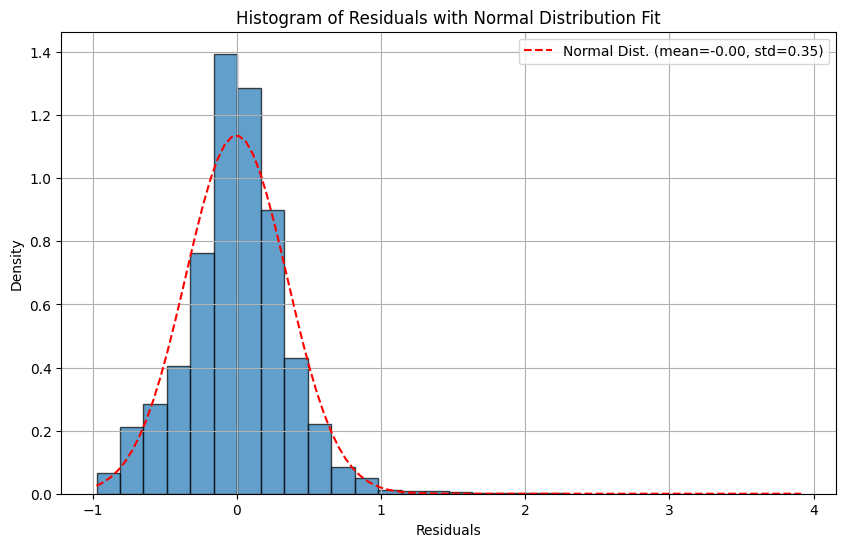

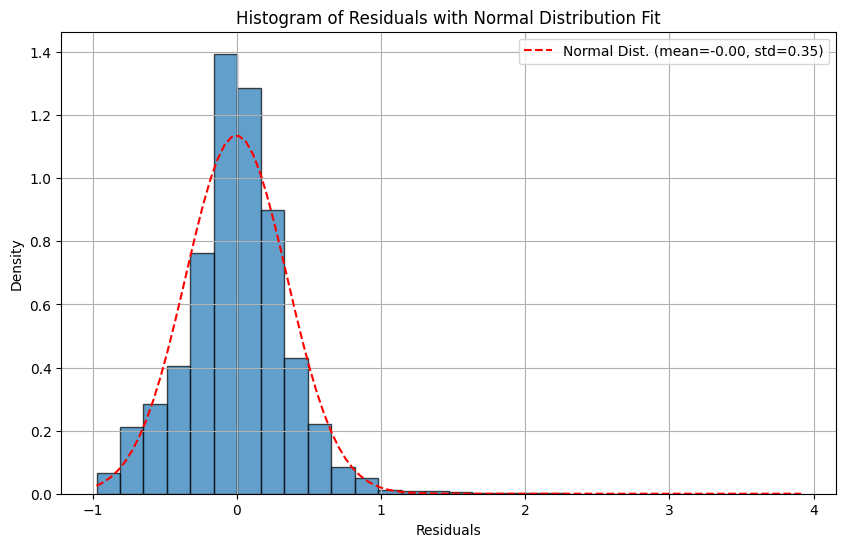

In [107]:


# Assuming you have already calculated residuals

# Calculate the mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Generate values for the normal distribution curve
x = np.linspace(min(residuals), max(residuals), 100)  # 100 values between the min and max of residuals
normal_dist = stats.norm.pdf(x, mean_residuals, std_residuals)  # Probability density function of the normal distribution

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, density=True, edgecolor='black', alpha=0.7)  # Use density=True to normalize the histogram
plt.title('Histogram of Residuals with Normal Distribution Fit')
plt.xlabel('Residuals')
plt.ylabel('Density')  # Changing to density instead of frequency

# Plot the normal distribution curve
plt.plot(x, normal_dist, 'r--', label=f'Normal Dist. (mean={mean_residuals:.2f}, std={std_residuals:.2f})')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.show()

# Assuming you have already calculated residuals

# Calculate the mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Generate values for the normal distribution curve
x = np.linspace(min(residuals), max(residuals), 100)  # 100 values between the min and max of residuals
normal_dist = stats.norm.pdf(x, mean_residuals, std_residuals)  # Probability density function of the normal distribution

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, density=True, edgecolor='black', alpha=0.7)  # Use density=True to normalize the histogram
plt.title('Histogram of Residuals with Normal Distribution Fit')
plt.xlabel('Residuals')
plt.ylabel('Density')  # Changing to density instead of frequency

# Plot the normal distribution curve
plt.plot(x, normal_dist, 'r--', label=f'Normal Dist. (mean={mean_residuals:.2f}, std={std_residuals:.2f})')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.show()


# 6: Evaluating the model

## 6.1: Feature importance with regularization 